# Tasca del test d'hipòtesis

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

The selected dataset is [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) which collects the athletes participating in the modern Olympic Games from Athens 1896 to Rio 2016. It has de following columns:
1. **ID**: unique numeric identifier for each athlete
2. **Name**: name of the athlete
3. **Sex**: masculine (M) of femenine (F) sex of the athlete
4. **Age**: age of the athlete
5. **Height**: height in centimeters
6. **Weight**: weight in kilograms
7. **Team**: team name
8. **NOC**: national olumpic comitte (3 letter code)
9. **Games**: year and season of the olympic games
10. **Year**: year of the olympic games
11. **Season**: season of the olympic games (summer or winter)
12. **City**: host city of the olympic games
13. **Sport**: sport
14. **Event**: event
15. **Medal**: won medal: gold, silver, bronze or NA

In [2]:
# Load the dataset
df = pd.read_csv('athlete_events.csv')

In [3]:
# View the dataset
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


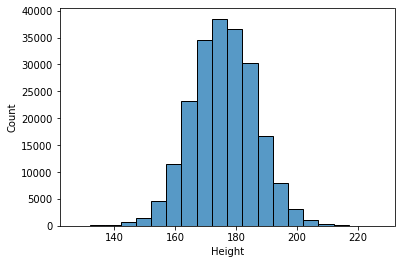

In [5]:
# Histogram of athlete's heights
sns.histplot(data=df, x='Height', binwidth=5);

In [6]:
# Mean of athlete's heights
round(df.Height.mean(), 2)

175.34

Hypothesis:
- $H_0: \mu_H = 175.34$  The average height of atheletes in the moderm Olympic Games is 175.34

- $H_1: \mu_H \neq 175.34$ The average height of atheletes in the moderm Olympic Games is not 175.34

In [7]:
# T-test for the mean of one group
alfa = 0.05
t_statistic, p_value = stats.ttest_1samp(df.Height.dropna(), popmean=df.Height.mean(), alternative='two-sided')
print(f't-statistic:\t{t_statistic}')
print(f'p-value:\t{p_value}')
print('We can reject the null hypothesis') if p_value < alfa else print('We cannot reject the null hypothesis')

t-statistic:	0.0
p-value:	1.0
We cannot reject the null hypothesis


Therefore, we can accept with an alfa level of 5% that the null hypothesis is true, that is, that the average height of the athletes is 175.34

## Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

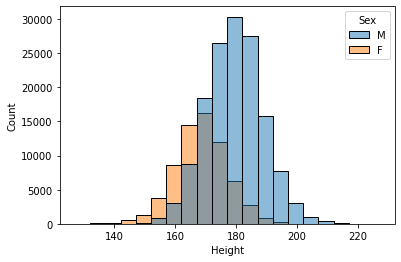

In [8]:
# Histogram of athlete's heights by sex
sns.histplot(data=df, x='Height', hue='Sex', binwidth=5);

In [9]:
# Female and male heights
female_heights = df[df.Sex == 'F'].Height.dropna()
male_heights = df[df.Sex == 'M'].Height.dropna()

Hypothesis:
- $H_0: \mu_M = \mu_F$  The average height of male athletes is the same as female athletes

- $H_1: \mu_M \neq \mu_F$ The average height of male athletes is different from the female athletes

In [10]:
# T-test for the mean of two groups
alfa = 0.05
t_statistic, p_value = stats.ttest_ind(female_heights, male_heights, alternative='two-sided')
print(f't-statistic:\t{t_statistic}')
print(f'p-value:\t{p_value}')
print('We can reject the null hypothesis') if p_value < alfa else print('We cannot reject the null hypothesis')

t-statistic:	-257.0759194444727
p-value:	0.0
We can reject the null hypothesis


Therefore, we can accept with an alfa level of 5% that the alternative hypothesis is true, that is, that the average height of male athletes is different from the females athletes.

## Exercici 3 

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [11]:
# Selection of 3 sports
df_sports3 = df[df.Sport.isin(['Athletics', 'Gymnastics', 'Basketball'])]

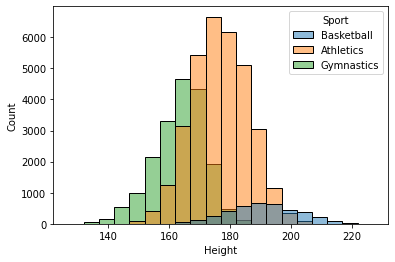

In [12]:
# Histogram of athlete's heights by sport
sns.histplot(data=df_sports3, x='Height', hue='Sport', binwidth=5);

In [13]:
# Athletics, Gymnastics and Basketball heights
athletics_heights = df[df.Sport == 'Athletics'].Height.dropna()
gymnastics_heights = df[df.Sport == 'Gymnastics'].Height.dropna()
basketball_heights = df[df.Sport == 'Basketball'].Height.dropna()

Hypothesis:
- $H_0: \mu_A = \mu_G = \mu_B$  The average height of athletics, gymnastics and basketball players is the same

- $H_1: \mu_A \neq \mu_G \neq \mu_B$  The average height of athletics, gymnastics and basketball players is not the same

In [14]:
# ANOVA test for the mean of three groups
alfa = 0.05
anova_statistic, p_value = stats.f_oneway(athletics_heights, gymnastics_heights, basketball_heights)
print(f'F-statistic:\t{t_statistic}')
print(f'p-value:\t{p_value}')
print('We can reject the null hypothesis') if p_value < alfa else print('We cannot reject the null hypothesis')

F-statistic:	-257.0759194444727
p-value:	0.0
We can reject the null hypothesis


Therefore, we can accept with an alfa level of 5% that the alternative hypothesis is true, that is, that the average height of athletics, gymnastics and basketball players is not the same.